
#Deep Learning con Python



### Autor: Erwing FC 

#### ~erwingforerocastro@gmail.com 


##Clasificacion de imagenes
En el siguiente ejemplo se trataran imagenes de perros y gatos, donde trataremos varias estrategias para reducir al maximo el sobre-entrenamiento y la falta de datos de entrenamiento.

In [0]:
from google.colab import files
files.upload() #subimos el archivo
import os
import zipfile
local_zip='/content/cats_and_dogs_small.zip' #ruta donde guarda los archivos colab
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir='/tmp/cats_and_dogs_small'  #ruta donde se descomprimio el archivo

#rutas secundarias
train_dir= os.path.join(base_dir,'train')
test_dir= os.path.join(base_dir,'test')
validation_dir= os.path.join(base_dir,'validation')

#imagenes de entrenamiento 50%
train_dogs_dir=os.path.join(train_dir,'dogs')
train_cats_dir=os.path.join(train_dir,'cats')

#imagenes de prueba  25%
test_dogs_dir=os.path.join(test_dir,'dogs')
test_cats_dir=os.path.join(test_dir,'cats')

#imagenes de validacion 25%
validation_dogs_dir=os.path.join(validation_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')

In [0]:
#nombres de los ficheros de las primeras 5 imagenes
train_cat_fnames = os.listdir( train_cats_dir ) 
print(train_cat_fnames[:5]) 

train_dog_fnames = os.listdir( train_dogs_dir ) 
print(train_dog_fnames[:5]) 

validation_cat_fnames = os.listdir( validation_cats_dir ) 
print(validation_cat_fnames[:5]) 

validation_dog_fnames = os.listdir( validation_dogs_dir ) 
print(validation_dog_fnames[:5]) 

test_cat_fnames = os.listdir( test_cats_dir ) 
print(test_cat_fnames[:5]) 

test_dog_fnames = os.listdir( test_dogs_dir ) 
print(test_dog_fnames[:5])

In [0]:
#cantidad de imagenes en los directorios

print('total training cat images:', len(os.listdir(train_cats_dir ) )) 
print('total training dog images:', len(os.listdir(train_dogs_dir ) )) 
print('total validation cat images :', len(os.listdir( validation_cats_dir ) )) 
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) )) 
print('total test cat images :', len(os.listdir( test_cats_dir ) )) 
print('total test dog images :', len(os.listdir( test_dogs_dir ) )) 

In [0]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
#funcion para mostrar las imagenes
def print_pictures(dir,fnames):
  #presentamos las imagenes 4x4
  nrows=4
  ncols=4
  pic_index=0 #indice para iterar sobre las imagenes

  fig=plt.gcf()
  fig.set_size_inches(ncols*4,nrows*4)

  pic_index+=8
  
  next_pix=[os.path.join(dir,fname)
             for fname in fnames[pic_index-8:pic_index]] #las primeras 8 imagenes del fichero

  for i,img_path in enumerate(next_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    img=mpimg.imread(img_path)
    plt.imshow(img)
  
  plt.show()

print("Figura 10.3") 
print_pictures(train_cats_dir, train_cat_fnames) 
print("Figura 10.4") 
print_pictures(train_dogs_dir, train_dog_fnames) 
print("Figura 10.5") 
print_pictures(validation_cats_dir, validation_cat_fnames) 
print("Figura 10.6") 
print_pictures(validation_dogs_dir, validation_dog_fnames) 
print("Figura 10.7") 
print_pictures(test_cats_dir, test_cat_fnames) 
print("Figura 10.8") 
print_pictures(test_dogs_dir, test_dog_fnames)


In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Conv2D

#Data Augmentation
modelDA=Sequential()
modelDA.add(Conv2D(32,(3,3),activation='relu',
                 input_shape=(150,150,3)))    
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(64,(3,3),activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128,(3,3),activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128,(3,3),activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Flatten())
modelDA.add(Dense(512,activation='relu'))
modelDA.add(Dense(1,activation='sigmoid'))

#feature extraction  
pre_trained_model1 = VGG16(input_shape = (150, 150, 3), 
                          include_top = False, 
                          weights = 'imagenet')
#file tuning
pre_trained_model2 = VGG16(input_shape = (150, 150, 3), 
                          include_top = False, 
                          weights = 'imagenet')

In [0]:
#feature extraction
for layer in pre_trained_model1.layers:
  layer.trainable=False

#fine Tuning
pre_trained_model.trainable=True
set_trainable=False

for layer in pre_trained_model2.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False



#agregamos el modelo y las capas propias

#feature extraction
modelFE = Sequential() 
modelFE.add(pre_trained_model1) 
modelFE.add(Flatten()) 
modelFE.add(Dense(256, activation='relu')) 
modelFE.add(Dense(1, activation='sigmoid'))

#file tuning
modelFT = Sequential() 
modelFT.add(pre_trained_model2) 
modelFT.add(Flatten()) 
modelFT.add(Dense(256, activation='relu')) 
modelFT.add(Dense(1, activation='sigmoid'))

In [38]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
modelDA.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
#feature extraction
modelFE.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
#file tuning
modelFT.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

#intanciamos los generadores
train_datagen=ImageDataGenerator( #1 se realiza el dataaugmentation solo a los ejemplos de entrenamiento
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)  
test_datagen=ImageDataGenerator(rescale=1.0/255.)
validation_datagen=ImageDataGenerator(rescale=1.0/255.)

#flow(data,labels) cuando no se tiene directorio en nuestro caso usamos este:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))

test_generator=test_datagen.flow_from_directory(test_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))

validation_generator=validation_datagen.flow_from_directory(validation_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
batch_size=20
steps_per_epoch=train_generator.n // batch_size
validation_steps=validation_generator.n // batch_size
print(steps_per_epoch)
print(validation_steps)

100
50


In [40]:
#entrenamiento del modelo
#Data Augmentation
historyDA = modelDA.fit (train_generator, 
                     steps_per_epoch= steps_per_epoch,
                     epochs=20, 
                     validation_data = validation_generator, 
                     validation_steps = validation_steps)
#feature extraction
historyFE = modelFE.fit (train_generator, 
                     steps_per_epoch= steps_per_epoch,
                     epochs=20, 
                     validation_data = validation_generator, 
                     validation_steps = validation_steps)
#file tuning
historyFT = modelFT.fit (train_generator, 
                     steps_per_epoch= steps_per_epoch,
                     epochs=20, 
                     validation_data = validation_generator, 
                     validation_steps = validation_steps)

Epoch 1/20
100/100 [==============================] - 17s 166ms/step - loss: 0.6929 - acc: 0.5315 - val_loss: 0.7030 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 16s 163ms/step - loss: 0.6795 - acc: 0.5545 - val_loss: 0.6597 - val_acc: 0.5860
Epoch 3/20
100/100 [==============================] - 16s 162ms/step - loss: 0.6718 - acc: 0.5835 - val_loss: 0.6482 - val_acc: 0.6060
Epoch 4/20
100/100 [==============================] - 16s 162ms/step - loss: 0.6545 - acc: 0.6010 - val_loss: 0.6742 - val_acc: 0.5350
Epoch 5/20
100/100 [==============================] - 16s 164ms/step - loss: 0.6409 - acc: 0.6285 - val_loss: 0.6058 - val_acc: 0.6660
Epoch 6/20
100/100 [==============================] - 16s 162ms/step - loss: 0.6221 - acc: 0.6515 - val_loss: 0.5980 - val_acc: 0.6710
Epoch 7/20
100/100 [==============================] - 16s 162ms/step - loss: 0.6100 - acc: 0.6640 - val_loss: 0.5817 - val_acc: 0.6870
Epoch 8/20
100/100 [==============================] - 1

<Figure size 432x288 with 0 Axes>

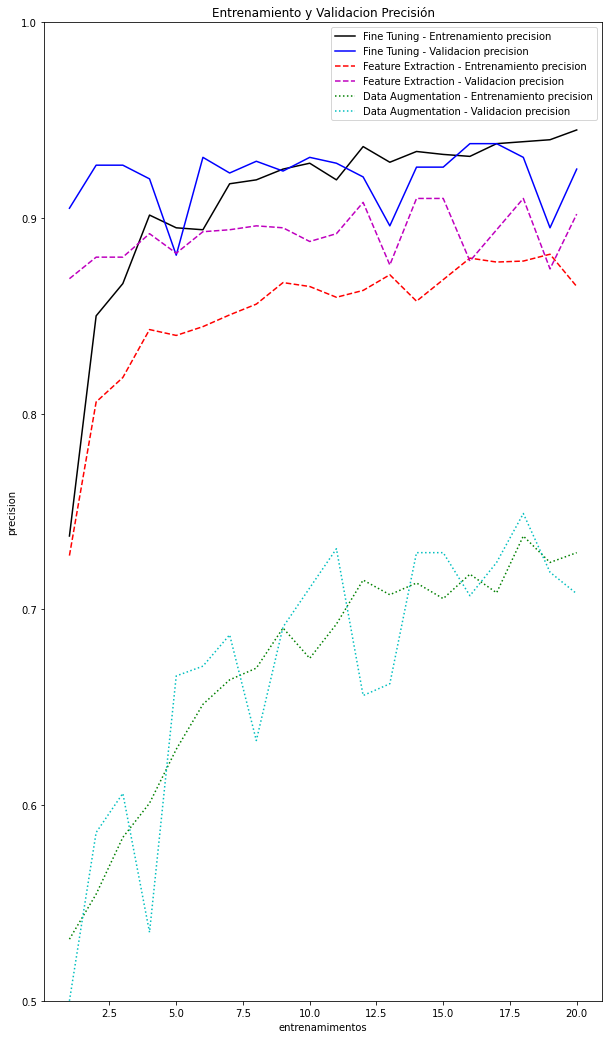

<Figure size 432x288 with 0 Axes>

In [46]:
accDA = historyDA.history[ 'acc' ] 
val_accDA = historyDA.history[ 'val_acc' ] 
accFE = historyFE.history[ 'acc' ] 
val_accFE = historyFE.history[ 'val_acc' ] 
accFT = historyFT.history[ 'acc' ] 
val_accFT = historyFT.history[ 'val_acc' ] 

epochs = range(1,len(accDA)+1,1)
plt.figure(figsize=(10,18)) 
plt.plot ( epochs, accFT, 'k', label='Fine Tuning - Entrenamiento precision' ) 
plt.plot ( epochs, val_accFT, 'b', label='Fine Tuning - Validacion precision') 
plt.plot ( epochs, accFE, 'r--', label='Feature Extraction - Entrenamiento precision' ) 
plt.plot ( epochs, val_accFE, 'm--', label='Feature Extraction - Validacion precision') 
plt.plot ( epochs, accDA, 'g:', label='Data Augmentation - Entrenamiento precision' ) 
plt.plot ( epochs, val_accDA, 'c:', label='Data Augmentation - Validacion precision') 
plt.title ('Entrenamiento y Validacion Precisión') 
plt.ylabel('precision') 
plt.ylim(0.5,1) 
plt.xlabel('entrenamimentos') 
plt.legend() 
plt.figure() 

In [47]:
#el modelo sufre de sobre entrenamiento
#Data Augmentation
test_lost, test_acc= modelDA.evaluate (test_generator) 
print ("Precisión de data augmentation model:", f'{round(test_acc*100,2)}%')
#Feature extraction
test_lost, test_acc= modelFE.evaluate (test_generator) 
print ("Precisión de feature extraction:", f'{round(test_acc*100,2)}%')
#File Tuning
test_lost, test_acc= modelFT.evaluate (test_generator) 
print ("Precisión de file tuning:", f'{round(test_acc*100,2)}%')

50/50 [==============================] - 2s 49ms/step - loss: 0.6172 - acc: 0.7050
Precisión de data augmentation model: 70.5%
50/50 [==============================] - 3s 59ms/step - loss: 0.2518 - acc: 0.9010
Precisión de feature extraction: 90.1%
50/50 [==============================] - 3s 60ms/step - loss: 0.5342 - acc: 0.9110
Precisión de file tuning: 91.1%


In [0]:
#probamos
import numpy as np
from tensorflow.keras.preprocessing import image
#subimos una imagen
uploaded=files.upload()
fn=list(uploaded.keys())[0]
path='/content/'+fn
img=image.load_img(path,target_size=(150,150))
x=image.img_to_array(img)
image=np.expand_dims(x,axis=0)

plt.imshow(img)
plt.show()

classes=[modelDA.predict(image),modelFE.predict(image),modelFT.predict(image)]

print('El modelo con Data augmentation predijo: ',f'{fn} es un perro' if classes[0]>0 else f'{fn} es un gato')
print('El modelo con Featured extraction predijo: ',f'{fn} es un perro' if classes[1]>0 else f'{fn} es un gato')
print('El modelo con File Tuning predijo: ',f'{fn} es un perro' if classes[2]>0 else f'{fn} es un gato')